#**Preparing our dataset**





In [ ]:
# To keep the page organized, we will do all the imports here
import pandas as pd
from scipy import stats
from scipy.stats import ttest_ind
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


# Surpress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings('ignore')

Link: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data

The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

In [ ]:
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

Now, we will do a quick examination of our dataset

In [ ]:
df.shape

(374, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Notice that the number of non-null counts is the same for all column variables. Hence, there are no null entries.

In [ ]:
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


Transforming the 'BMI Category' column for duplicate values

In [ ]:
# List all unique values in the 'BMI Category' column
unique_bmi_categories = df['BMI Category'].unique()

# Print the unique values
print('Unique BMI Categories:')
for category in unique_bmi_categories:
  print(category)

Unique BMI Categories:
Overweight
Normal
Obese
Normal Weight


Note in this case, both 'Normal' and 'Normal Weight' mean the same thing: a BMI between 18.5 and 24.0

In [ ]:
# Replace 'Normal Weight' with 'Normal'
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

# Display unique values in the 'BMI Category' column after the change
print('After:')
print(df['BMI Category'].unique())

After:
['Overweight' 'Normal' 'Obese']


We will then be standardizing blood pressure values by converting them to a single numeric value representing mean arterial pressure (MAP). This allows us to perform any analysis or calculations based on them. It also makes it easier to compare and analyze blood pressure readings across different patients over time.

In [ ]:
# Function to calculate Mean Arterial Pressure (MAP)
def calculate_MAP(blood_pressure):
  sbp, dbp = map(int, blood_pressure.split('/'))
  return (sbp + 2 * dbp) / 3

# Standardiz blood pressure values in the 'Blood Pressure' column of sleep_df
df['MAP'] = df['Blood Pressure'].apply(calculate_MAP)

# Round the 'MAP' column to two decimal places
df['MAP'] = df['MAP'].round(2)

#Demographic Analysis


##1. How does sleep duration vary across different age groups and gender?

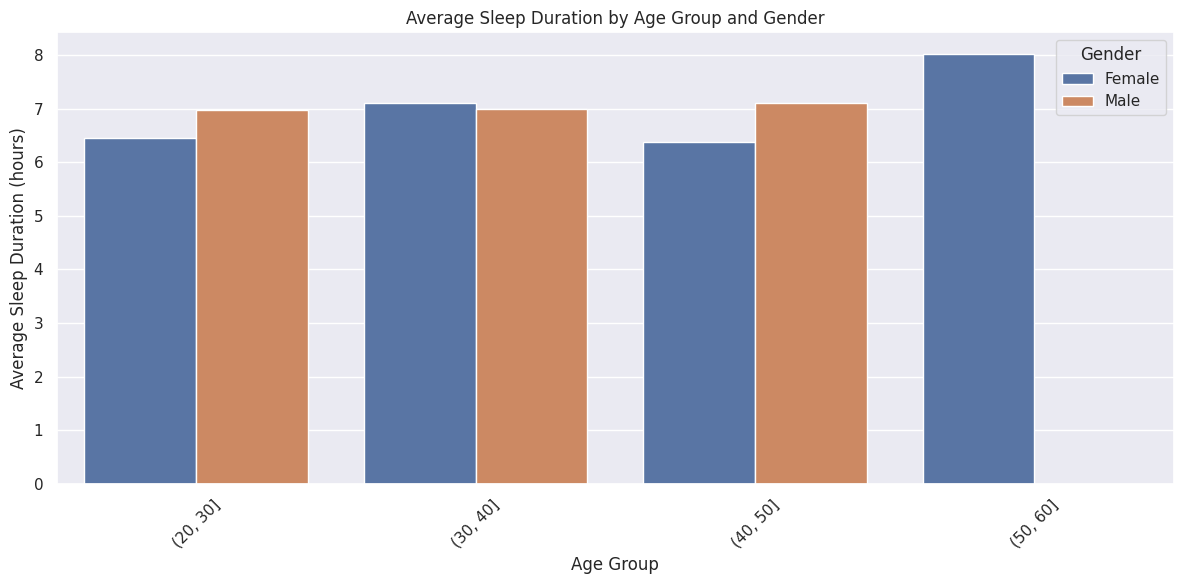

In [ ]:
# Filter the dataset to include relevant columns
sleep_duration_df = df[['Gender', 'Age', 'Sleep Duration']]

# Group the data by age group and gender, and calculate average sleep duration
sleep_duration_grouped = sleep_duration_df.groupby(['Gender', pd.cut(df['Age'], bins=[20, 30, 40, 50, 60])])['Sleep Duration'].mean().reset_index()

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Sleep Duration', hue='Gender', data=sleep_duration_grouped)
plt.title('Average Sleep Duration by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Our distribution of age groups with bins the size of 10 is relatively similar for all genders. However, there seems to be no entries for males in the age group 50-60. We also notice that people from 50-60 tend to sleep an extra hour.

##2. Are there differences in stress levels between males and females, or across different age groups?

Male Stress Statistics:
count    189.000000
mean       6.079365
std        1.300183
min        3.000000
25%        5.000000
50%        6.000000
75%        7.000000
max        8.000000
Name: Stress Level, dtype: float64

Female Stress Statistics:
count    185.000000
mean       4.675676
std        1.911835
min        3.000000
25%        3.000000
50%        4.000000
75%        6.000000
max        8.000000
Name: Stress Level, dtype: float64


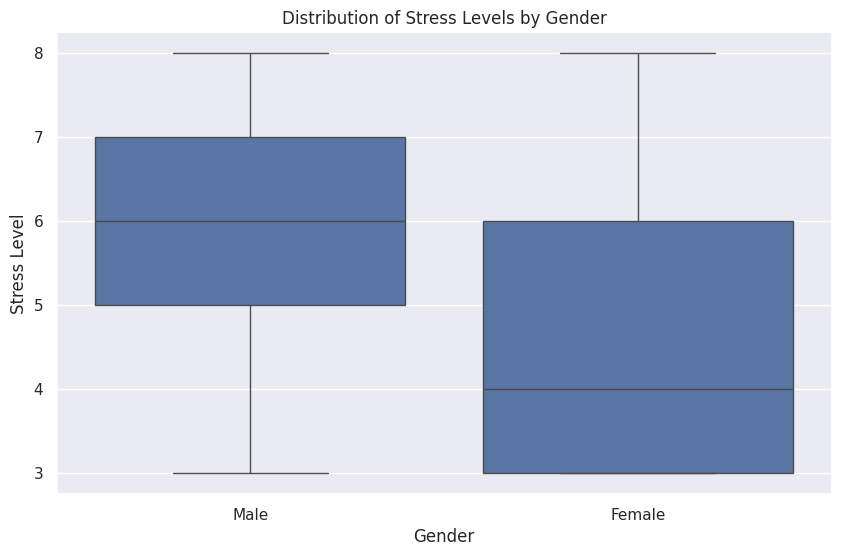


Age Group Stress Statistics:
           count      mean       std  min  25%  50%  75%  max
Age Group                                                    
20-30       19.0  7.315789  0.885226  6.0  6.5  8.0  8.0  8.0
30-40      142.0  5.521127  1.495707  3.0  4.0  5.0  6.0  8.0
40-50      117.0  5.675214  1.382333  3.0  5.0  5.0  7.0  8.0
50-60       96.0  4.447917  2.190265  3.0  3.0  3.0  7.0  8.0


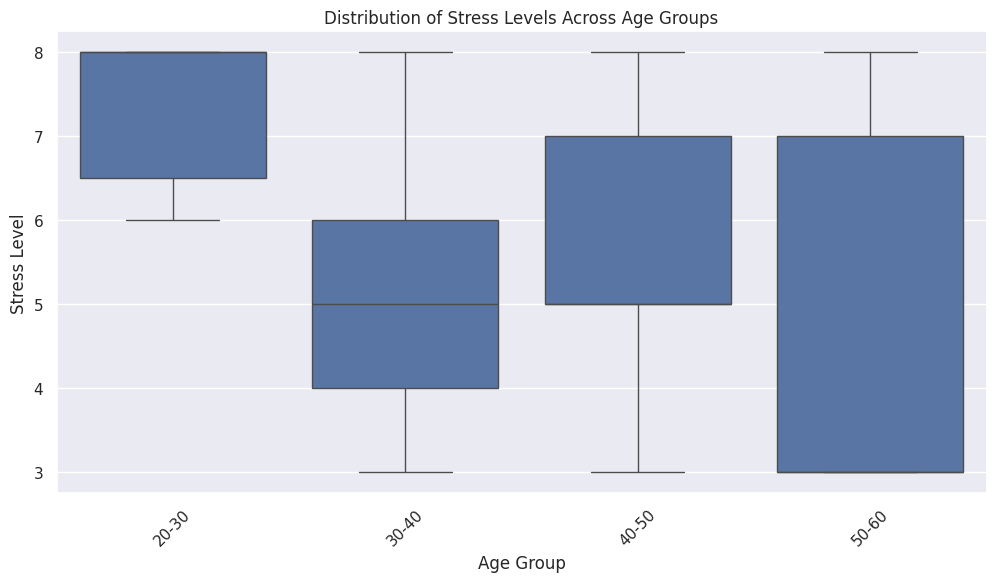

In [ ]:
# Filter the dataset to include relevant columns
stress_df = df[['Gender', 'Age', 'Stress Level']]

# Calculate summary statistics of stress levels for males and females separately
male_stress_stats = stress_df[stress_df['Gender'] == 'Male']['Stress Level'].describe()
female_stress_stats = stress_df[stress_df['Gender'] == 'Female']['Stress Level'].describe()

print('Male Stress Statistics:')
print(male_stress_stats)
print('\nFemale Stress Statistics:')
print(female_stress_stats)

# Visualize the distribution of stress levels for males and females
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Stress Level', data=stress_df)
plt.title('Distribution of Stress Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Stress Level')
plt.show()

# Group the data by age groups and calculate summary statistics of stress levels for each age group
age_bins = [20, 30, 40, 50, 60]
age_labels = ['20-30', '30-40', '40-50', '50-60']
stress_df['Age Group'] = pd.cut(stress_df['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_stats = stress_df.groupby('Age Group')['Stress Level'].describe()

print('\nAge Group Stress Statistics:')
print(age_group_stats)

# Visualize the distribution of stress levels across different age groups
plt.figure(figsize=(12,6))
sns.boxplot(x='Age Group', y='Stress Level', data=stress_df)
plt.title('Distribution of Stress Levels Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Stress Level')
plt.xticks(rotation=45)
plt.show()

The stress levels vary across different age groups, with individuals aged 20-30 reporting the highest average stres level of approximately 7.32, followed by those in the 30-40 age group with a mean stress level of 5.52. In contrast, individuals in the 5060 age group exhibit the lowest average stress level of approximately 4.45. Furthermore, there seems to be a trend of increasing stress levels from older to younger age groups, as indicated by the decreasing mean stress levels across the age groups.

##3. Is there a correlation between occupation and sleep quality or stress level?

<function matplotlib.pyplot.show(close=None, block=None)>

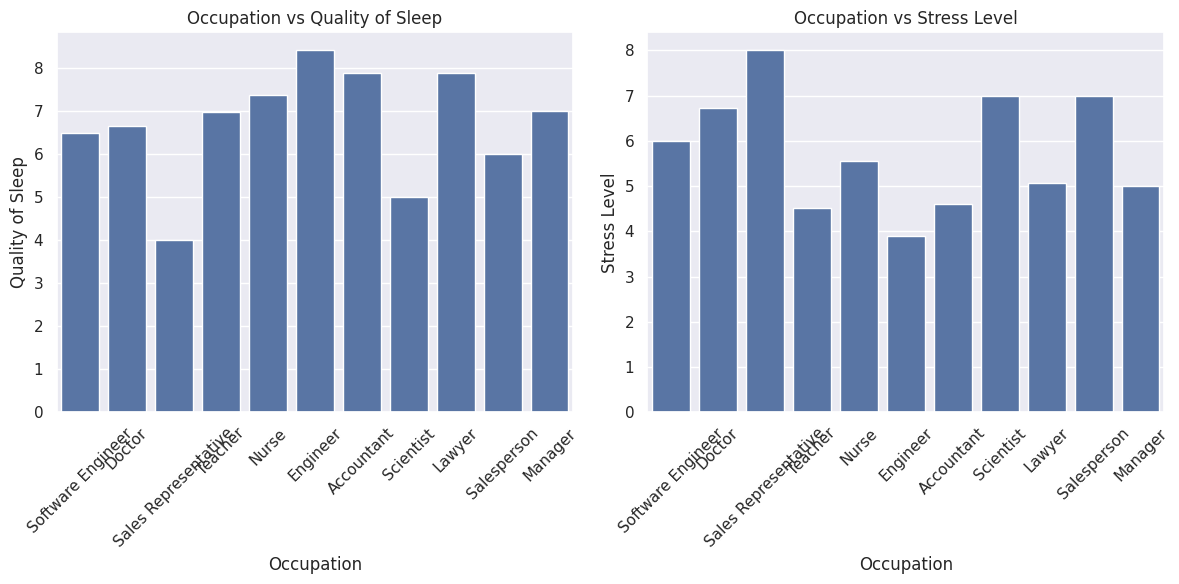

In [ ]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create a bar plot for 'Occupation' vs 'Quality of Sleep'
plt.subplot(1, 2, 1)
sns.barplot(x='Occupation', y='Quality of Sleep', data=df, ci=None)
plt.title('Occupation vs Quality of Sleep')
plt.xticks(rotation=45)
plt.xlabel('Occupation')
plt.ylabel('Quality of Sleep')

# Create a bar plot for 'Occupation' vs 'Stress' Level'
plt.subplot(1, 2, 2)
sns.barplot(x='Occupation', y='Stress Level', data=df, ci=None)
plt.title('Occupation vs Stress Level')
plt.xticks(rotation=45)
plt.xlabel('Occupation')
plt.ylabel('Stress Level')

#Adjust layout
plt.tight_layout()

#Show the plot
plt.show

#Health and Lifestyle Factors:

##1. How does physical activity level correlate wth sleep quality and stress level?

Correlation between Physical Activity Level and Sleep Quality: 0.19289645493975302
Correlation between Physical Activity Level and Stress Level: -0.03413446351674205


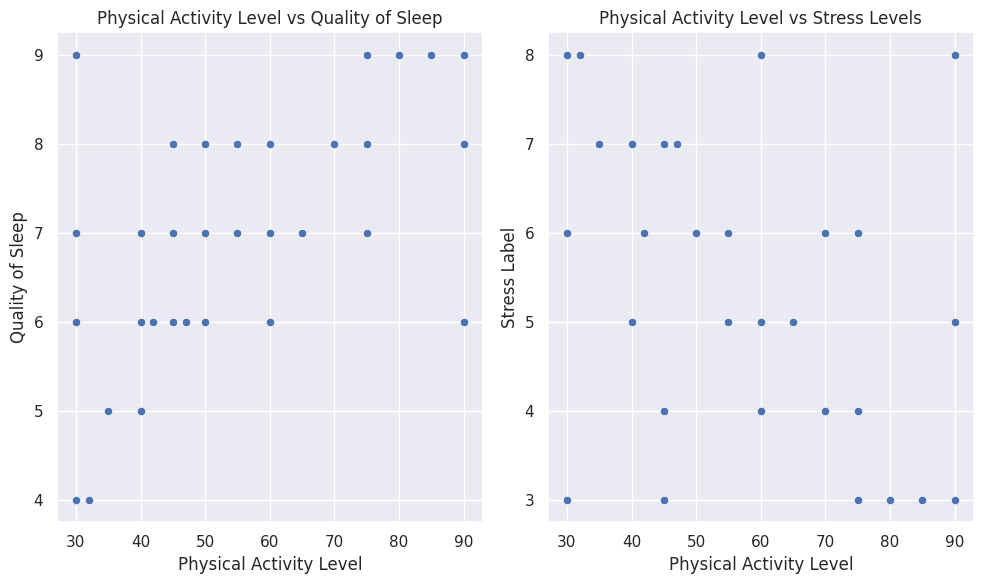

In [ ]:
# Filter the dataset to include relevant columns
activity_sleep_stress_df = df[['Physical Activity Level', 'Quality of Sleep', 'Stress Level']]

# Correlation analysis
correlation_sleep_quality = activity_sleep_stress_df['Physical Activity Level'].corr(activity_sleep_stress_df['Quality of Sleep'])
correlation_stress_level = activity_sleep_stress_df['Physical Activity Level'].corr(activity_sleep_stress_df['Stress Level'])

print('Correlation between Physical Activity Level and Sleep Quality:', correlation_sleep_quality)
print('Correlation between Physical Activity Level and Stress Level:', correlation_stress_level)

# Visualization
plt.figure(figsize=(10, 6))

# Scatter plot for Physical Activity Level vs Quality of Sleep
plt.subplot(1, 2, 1)
sns.scatterplot(x='Physical Activity Level', y='Quality of Sleep', data=activity_sleep_stress_df)
plt.title('Physical Activity Level vs Quality of Sleep')
plt.xlabel('Physical Activity Level')
plt.ylabel('Quality of Sleep')

# Scatter plot for Physical Activity Level vs Stress Level
plt.subplot(1, 2, 2)
sns.scatterplot(x='Physical Activity Level', y='Stress Level', data=activity_sleep_stress_df)
plt.title('Physical Activity Level vs Stress Levels')
plt.ylabel('Stress Label')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##2. Are individuals with higher BMI Categories more likely to experience sleep disorders or higher stress levels?

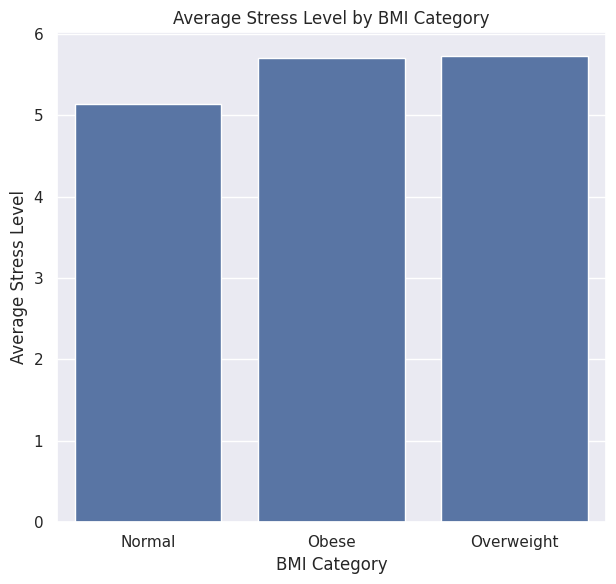

Summary statistics of stress levels categorized by BMI categories:
              count      mean       std  min  25%  50%   75%  max
BMI Category                                                     
Normal        216.0  5.134259  1.592287  3.0  4.0  5.0  6.00  8.0
Obese          10.0  5.700000  1.946507  3.0  5.0  5.0  7.75  8.0
Overweight    148.0  5.729730  1.957350  3.0  4.0  7.0  7.00  8.0


In [ ]:
# Filter the dataset to include relevant columns
bmi_sleep_stress_df = df[['BMI Category', 'Sleep Disorder', 'Stress Level']]

# Calculate average stress level for each BMI category
average_stress_level = bmi_sleep_stress_df.groupby('BMI Category')['Stress Level'].mean()

# Visualize the results
plt.figure(figsize=(12, 6))

# Bar plot for average stress level
plt.subplot(1, 2, 1)
sns.barplot(x=average_stress_level.index, y=average_stress_level.values)
plt.title('Average Stress Level by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average Stress Level')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Group the data by BMI categories and calculate summary statistics of stress levels
bmi_group_stats = bmi_sleep_stress_df.groupby('BMI Category')['Stress Level'].describe()

print('Summary statistics of stress levels categorized by BMI categories:')
print(bmi_group_stats)

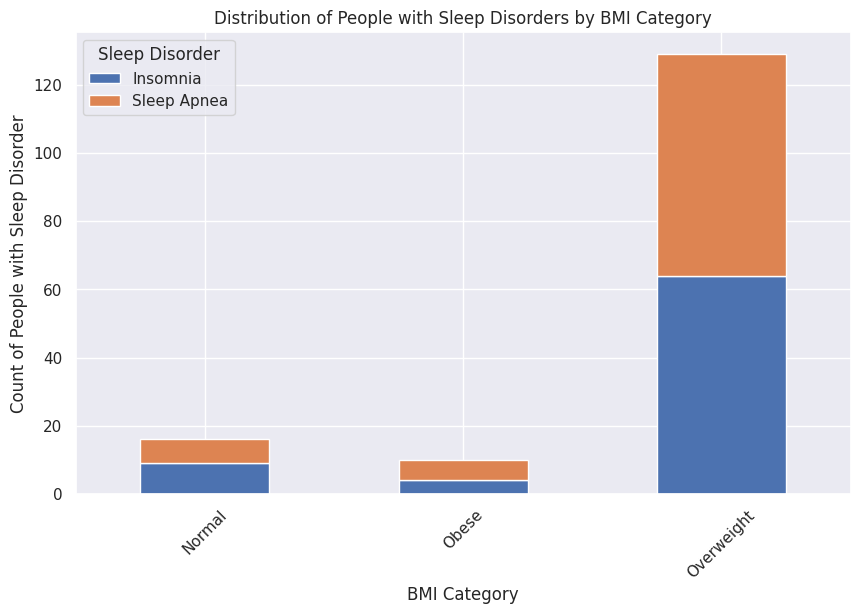

In [ ]:
# Filter the dataset to include relevant columns
bmi_sleep_disorder_df = df[['BMI Category', 'Sleep Disorder']]

# Drop rows with missing values
bmi_sleep_disorder_df = bmi_sleep_disorder_df.dropna()

# Filter rows where Sleep Disorder is not 'None'
bmi_sleep_disorder_df = bmi_sleep_disorder_df[bmi_sleep_disorder_df['Sleep Disorder'].isin(['Sleep Apnea', 'Insomnia'])]

# Count the occurrences of each sleep disorder in each BMI category
sleep_disorder_counts = (bmi_sleep_disorder_df
                         .groupby(['BMI Category', 'Sleep Disorder'])
                         .size()
                         .unstack(fill_value=0))

# Plot the distribution of people with sleep disorders based on BMI categories
sleep_disorder_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of People with Sleep Disorders by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count of People with Sleep Disorder')
plt.xticks(rotation=45)
plt.legend(title='Sleep Disorder')
plt.show()

Stress levels tend to increase slightly as BMI categories increase, with 'Normal' individuals experiencing a mean stress level of 5.13, 'Obese' individuals at 5.7, and 'Overweight' individuals at 5.73. We also notice that individuals who are overweight/obese tend to experience more sleep disorders (insomnia or sleep apnea).

* There is a low count for obese individuals due to the fact that there aren't much obese individuals in our dataset.

##3. Is there a relationship between blood pressure measurements and sleep quality/stress levels?

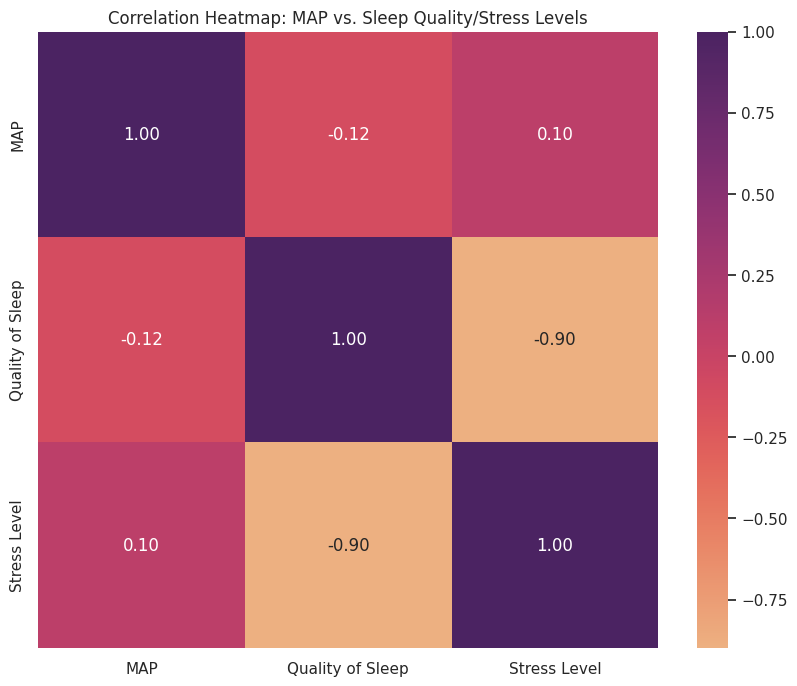

In [ ]:
# Select relevant columns for analysis
blood_pressure_sleep_stress_df = df[['MAP', 'Quality of Sleep', 'Stress Level']]

# Calculate correlation coefficients
correlation_matrix = blood_pressure_sleep_stress_df.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f")
plt.title('Correlation Heatmap: MAP vs. Sleep Quality/Stress Levels')
plt.show()

#Sleep Patterns and Disorders

##1. Do individuls with sleep disorders (insomnia, sleep apnea) report lower sleep quality and higher stress levels compared to those without sleep disorders?

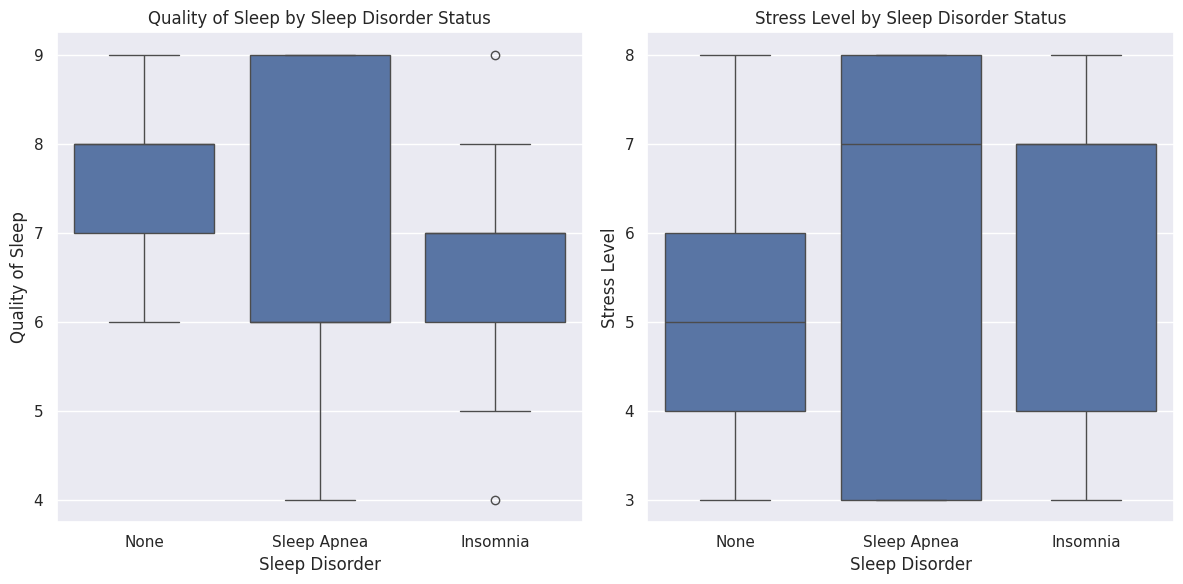

Summary Statistics for Quality of Sleep:
       Quality of Sleep  Stress Level
count        155.000000    155.000000
mean           6.870968      5.767742
std            1.337325      1.946757
min            4.000000      3.000000
25%            6.000000      4.000000
50%            7.000000      7.000000
75%            8.000000      7.000000
max            9.000000      8.000000


       Quality of Sleep  Stress Level
count        219.000000    219.000000
mean           7.625571      5.114155
std            0.975142      1.591471
min            6.000000      3.000000
25%            7.000000      4.000000
50%            8.000000      5.000000
75%            8.000000      6.000000
max            9.000000      8.000000


T-Test Results for Quality of Sleep:
t-statistic: -6.310971286065852
p-value: 7.891508863720975e-10


T-Test Results for Stress Level:
t-statistic: 3.563516215887529
p-value: 0.0004135421034039264


In [ ]:
# Filter the dataset to include relevant columns
sleep_disorder_df = df[['Sleep Disorder', 'Quality of Sleep', 'Stress Level']]

# Group the data by sleep disorder status
with_sleep_disorder = sleep_disorder_df[sleep_disorder_df['Sleep Disorder'] != 'None']
without_sleep_disorder = sleep_disorder_df[sleep_disorder_df['Sleep Disorder'] == 'None']

# Calculate summary statistics
with_sleep_disorder_stats = with_sleep_disorder[['Quality of Sleep', 'Stress Level']].describe()
without_sleep_disorder_stats = without_sleep_disorder[['Quality of Sleep', 'Stress Level']].describe()

# Perform t-tests to compare means between groups
quality_sleep_ttest = ttest_ind(with_sleep_disorder['Quality of Sleep'], without_sleep_disorder['Quality of Sleep'])
stress_level_ttest = ttest_ind(with_sleep_disorder['Stress Level'], without_sleep_disorder['Stress Level'])

# Visualize distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Sleep Disorder', y='Quality of Sleep', data=sleep_disorder_df)
plt.title('Quality of Sleep by Sleep Disorder Status')
plt.xlabel('Sleep Disorder')
plt.ylabel('Quality of Sleep')

plt.subplot(1, 2, 2)
sns.boxplot(x='Sleep Disorder', y='Stress Level', data=sleep_disorder_df)
plt.title('Stress Level by Sleep Disorder Status')
plt.xlabel('Sleep Disorder')
plt.ylabel('Stress Level')

plt.tight_layout()
plt.show()

# Print summary statistics and t-test results
print('Summary Statistics for Quality of Sleep:')
print(with_sleep_disorder_stats)
print("\n")
print(without_sleep_disorder_stats)
print("\n")
print("T-Test Results for Quality of Sleep:")
print("t-statistic:", quality_sleep_ttest.statistic)
print("p-value:", quality_sleep_ttest.pvalue)
print("\n")
print("T-Test Results for Stress Level:")
print("t-statistic:", stress_level_ttest.statistic)
print("p-value:", stress_level_ttest.pvalue)


Quality of Sleep: The t-statistic represents the magnitude of the difference in means between two groups. A negative t-statistic indicates that the mean quality of sleep is lower in individuals with sleep disorders compared to those without sleep disorders. The extremely low p-value (7.89e-10) suggests strong evidence against the null hypothesis (no difference in means). It indicates that the observed difference in mean quality of sleep between the two groups is statistically significant.

Stress Level: A positive t-statistic indicates that the mean stress level is higher in individuals with sleep disorders compared to those without sleep disorders. The low p-value(0.00041) suggests strong evidence against the null hypothesis (no difference in means). It indicates that the observed difference in mean stress level between the two groups is statistically significant.

In summary, individuals with sleep disorders tend to report significantly lower quality of sleep and higher stress levels compared to those without sleep disorders. These results are statistically significant, as indicated by the very low p-values.





# Heart Health

##1. Is there a correlation between resting heart rate and sleep quality/stress levels?

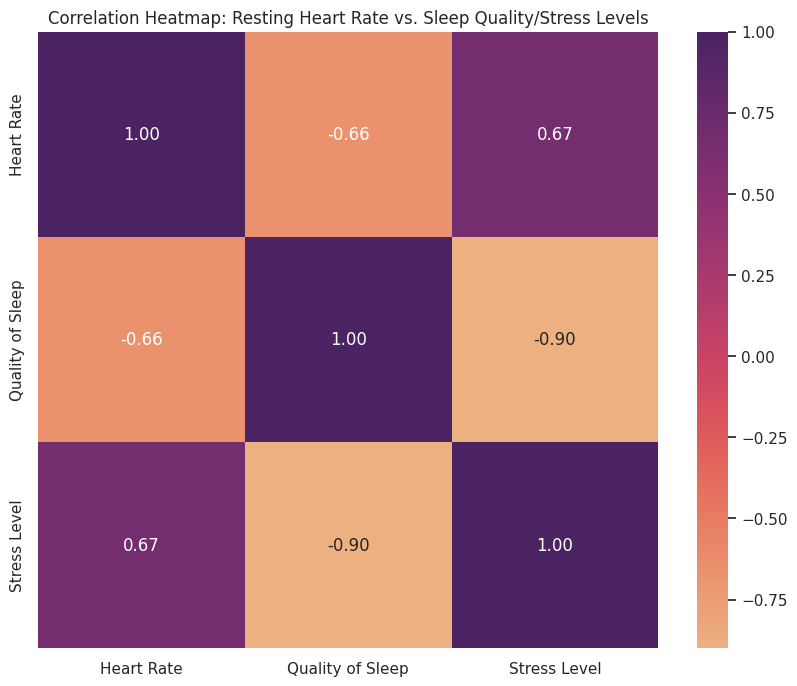

In [ ]:
# Select relevant columns for analysis
heart_rate_sleep_stress_df = df[['Heart Rate', 'Quality of Sleep', 'Stress Level']]

# Calculate correlation coefficients
correlation_matrix = heart_rate_sleep_stress_df.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt='.2f')
plt.title('Correlation Heatmap: Resting Heart Rate vs. Sleep Quality/Stress Levels')
plt.show()

Heart Rate and Quality of Sleep: The negative correlation coefficient of -0.66 suggests a strong inverse relationship between resting heart rate and quality of sleep. This means that as resting heart rate increases, the quality of sleep tends to decrease, and vice versa. In other words, individuals with higher resting heart rates may experience lower quality of sleep.

Heart Rate and Stress Level: The positive correlation coefficient of 0.67 suggests a strong direct relationship between resting heart rate and stress level. This means that as resting heart rate increases, the stress level also tends to increase. Conversely, as resting heart rate decreases, the stress level tends to decrease. In order words, individuals with higher resting heart rates may experience higher stress levels.

In summary, these findings suggest that resting heart rate is significantly associated with both quality of sleep and stress levels. A higher resting heart rate is linked to lower quality of sleep and higher stress levels, while a lower resting heart rate is associated with higher quality of sleep and lower stress levels. These relationships are statistically based on the strength of the correlation coefficients.

# Activity and Mobility

##1. How does the number of daily steps correlate with sleep quality and stress level?

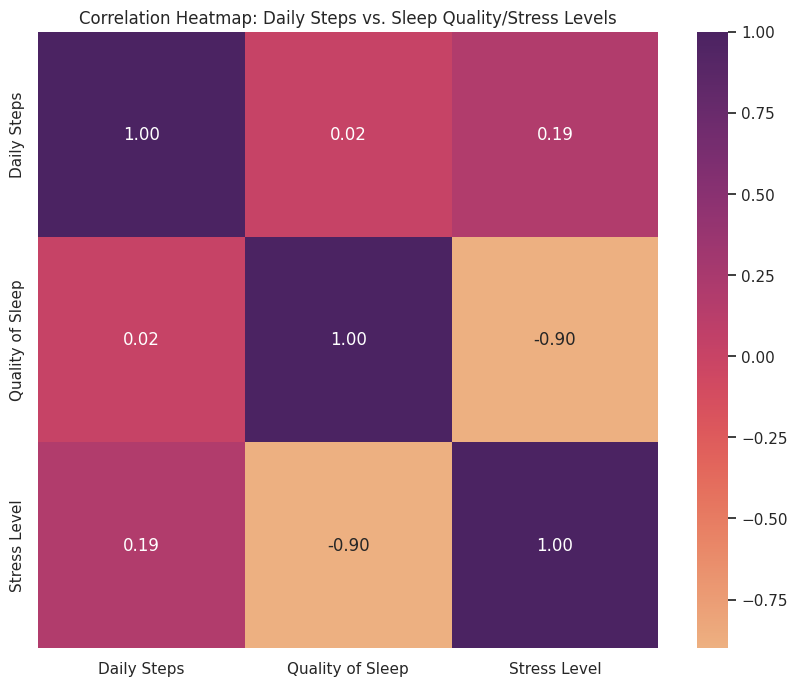

In [ ]:
# Select relevant columns for analysis
steps_sleep_stress_df = df[['Daily Steps', 'Quality of Sleep', 'Stress Level']]

# Calculate correlation coefficients
correlation_matrix = steps_sleep_stress_df.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt='.2f')
plt.title('Correlation Heatmap: Daily Steps vs. Sleep Quality/Stress Levels')
plt.show()

Daily Steps and Quality of Sleep: The correlation coefficient of 0.20 indicates a weak positive relationship between the number of daily steps and sleep quality. This suggests that there is a slight tendency for individuals who take more daily steps to report slightly higher quality of sleep. However, the correlation is relatively weak, meaning that the relationship is not very strong.

Daily Steps and Stress Level: Similarly, the correlation coefficient of 0.19 suggests a weak positive relationship between the number of daily steps and stress levels. This implies that individuals who take more daily steps tend to report slightl higher stress levels. Again, the correlation is relatively weak, indicating alimited strength in the relationship.

In summary, while there is a slight tendency for individuals who take more daily steps to report slightly higher quality of sleep and slight higher stress levels, the correlation are weak, suggesting that other factors may have a stronger influence on sleep quality and stress levels.

##2. Are there differences in sleep patterns or stress levels between individuals with sedentary lifestyles and those with more active lifestyles?

Referring to this medical paper, we will consider walking less than 5,000 steps each day to be considered sedentay.[Link](https://https://utswmed.org/medblog/how-many-steps-per-day/#:~:text=Depending%20on%20which%20research%20study,each%20day%20is%20considered%20sedentary.
)


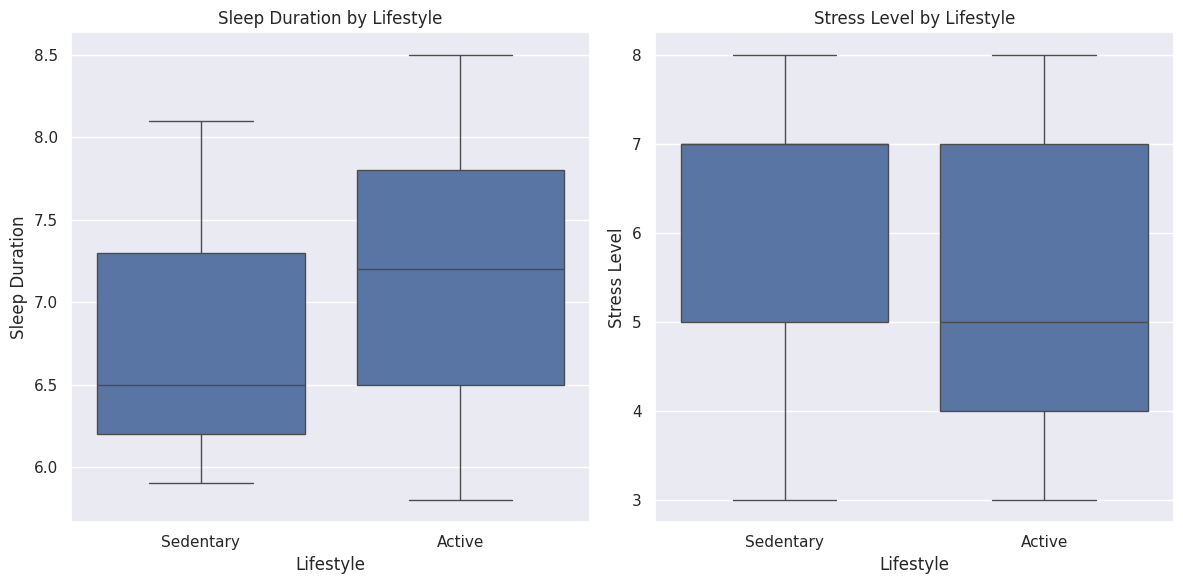

In [ ]:
# Define sedentary threshold
sedentary_threshold = 5000

# Categorize individuals into sedentary and active lifestyle gorups
sedentary_df = df[df['Daily Steps'] < sedentary_threshold]
active_df = df[df['Daily Steps'] >= sedentary_threshold]

# Statistical analysis
sedentary_sleep_stats = sedentary_df['Sleep Duration'].describe()
active_sleep_stats = active_df['Sleep Duration'].describe()

sedentary_stress_stats = sedentary_df['Stress Level'].describe()
active_stress_stats = active_df['Stress Level'].describe()

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Group', y='Sleep Duration', data=pd.concat([sedentary_df.assign(Group='Sedentary'), active_df.assign(Group='Active')]))
plt.title('Sleep Duration by Lifestyle')
plt.xlabel('Lifestyle')
plt.ylabel('Sleep Duration')

plt.subplot(1, 2, 2)
sns.boxplot(x='Group', y='Stress Level', data=pd.concat([sedentary_df.assign(Group='Sedentary'), active_df.assign(Group='Active')]))
plt.title('Stress Level by Lifestyle')
plt.xlabel('Lifestyle')
plt.ylabel('Stress Level')

plt.tight_layout()
plt.show()

In [ ]:
# Summary statistics for sedentary lifestyle group
sedentary_sleep_stats = sedentary_df['Sleep Duration'].describe()
sedentary_stress_stats = sedentary_df['Stress Level'].describe()

# Summary statistics for active lifestyle group
active_sleep_stats = active_df['Sleep Duration'].describe()
active_stress_stats = active_df['Stress Level'].describe()

# Print summary statistics
print("Summary Statistics for Sedentary Lifestyle:")
print("Sleep Duration:")
print(sedentary_sleep_stats)
print("\nStress Level:")
print(sedentary_stress_stats)

print("\nSummary Statistics for Active Lifestyle:")
print("Sleep Duration:")
print(active_sleep_stats)
print("\nStress Level:")
print(active_stress_stats)


Summary Statistics for Sedentary Lifestyle:
Sleep Duration:
count    19.000000
mean      6.700000
std       0.696818
min       5.900000
25%       6.200000
50%       6.500000
75%       7.300000
max       8.100000
Name: Sleep Duration, dtype: float64

Stress Level:
count    19.000000
mean      6.210526
std       1.512134
min       3.000000
25%       5.000000
50%       7.000000
75%       7.000000
max       8.000000
Name: Stress Level, dtype: float64

Summary Statistics for Active Lifestyle:
Sleep Duration:
count    355.000000
mean       7.155211
std        0.794860
min        5.800000
25%        6.500000
50%        7.200000
75%        7.800000
max        8.500000
Name: Sleep Duration, dtype: float64

Stress Level:
count    355.000000
mean       5.340845
std        1.778527
min        3.000000
25%        4.000000
50%        5.000000
75%        7.000000
max        8.000000
Name: Stress Level, dtype: float64


Individuals with sedentary lifestyles tend to have shorter sleep durations on average (6.70 hours) compared to those with active lifestyles (7.16 hours). Additionally, sedentary individuals generally experience higher stress levels (mean: 6.21) compared to their more active counterparts (mean 5.34).